In [1]:
import os
from sktime.datasets import load_from_ucr_tsv_to_dataframe
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import RobustScaler
from utils import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
datasets = get_all_datasets()

In [3]:
method='tsfresh'
run='1'

all_datasets = []

for dataset in datasets[::50]:
    print(dataset)
    X_test, y_test = load_from_ucr_tsv_to_dataframe(
    os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TEST.tsv")
    )
    
    X_test = interpolate_scale_single(X_test)
    all_datasets.append(X_test.sample(n=50, replace=True))

DodgerLoopWeekend


/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep 

UWaveGestureLibraryZ


/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep 

DiatomSizeReduction


/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in self.X_multiindex.groupby(level=iter_levels, sort=False):
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/datatypes/_vectorize.py:265: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep 

In [4]:
df = pd.concat(all_datasets, axis=0).reset_index(drop=True)

In [5]:
transformation = transformation_factory("WhiteNoise;0.05")
embedding = feature_factory('tsfresh', 0)

df_t = transformation(df)
df_r = embedding.fit_transform(df)
df_t_r = embedding.transform(df_t)

CudaAPIError: [2] Call to cuDevicePrimaryCtxRetain results in CUDA_ERROR_OUT_OF_MEMORY

In [ ]:
plt.scatter(df_r.mean().to_list(), df_t_r.mean().to_list(), s=3)
plt.yscale('symlog')
plt.xscale('symlog')
plt.grid()

limits = [
    np.min([plt.xlim(), plt.ylim()]),
    np.max([plt.xlim(), plt.ylim()])
]

plt.plot(limits, limits, '-', alpha=0.5, color='gray')
plt.xlabel('Mean feature value before transformation')
plt.ylabel('Mean feature value after transformation')
plt.savefig(f'figures/xy_feature_plot_whitenoise_tsfresh.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
transformation = transformation_factory("WhiteNoise;0.01")
embedding = feature_factory('rocket', 0)

df_t = transformation(df)
df_r = embedding.fit_transform(df)
df_t_r = embedding.transform(df_t)

scaler = MinMaxScaler()
df_r = pd.DataFrame(scaler.fit_transform(df_r), columns=df_r.columns)
df_t_r = pd.DataFrame(scaler.transform(df_t_r), columns=df_t_r.columns)

plt.scatter(df_r.mean().to_list(), df_t_r.mean().to_list(), s=3)
plt.yscale('symlog')
plt.xscale('symlog')
plt.xlim([-0.2, 1.3])
plt.ylim([-0.2, 1.3])
plt.grid()

limits = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()])   # max of both axes
]

# Plot x=y line
plt.plot(limits, limits, '-', alpha=0.5, color='gray')

In [ ]:
df_t_r.mean().max()

In [ ]:
#diff = df_r-df_t_r
#diff

In [ ]:
#transformations = ["WhiteNoise;0", "WhiteNoise;0.001", "WhiteNoise;0.002", "WhiteNoise;0.005", "WhiteNoise;0.01",
#                   "WhiteNoise;0.02", "WhiteNoise;0.05", "WhiteNoise;0.1", "WhiteNoise;0.2", "WhiteNoise;0.5", 
#                   "WhiteNoise;1.0", "WhiteNoise;2.0", "WhiteNoise;5.0"]
#
##transformations = [x.replace('WhiteNoise', 'Constant') for x in transformations]
##transformations = [x.replace('WhiteNoise', 'Scale') for x in transformations][1:]
#transformations = [f'Resample;{x}' for x in list(reversed([round(0.9**x, 4) for x in range(7)])) + [round(1.2**x, 4) for x in range(1, 7)]]
#
#transformations

In [ ]:
#sum_df = df.head(10)
#
#v = []
#transform_tsfresh = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False, n_jobs=-1)
#for transformation in transformations:
#    #print(transformation)
#    t = transformation_factory(transformation)
#    h = t(sum_df)
#    v.append(transform_tsfresh.fit_transform(h))

In [ ]:
#tab = transform_tsfresh.fit_transform(t(sum_df))

In [8]:
x = np.random.randn(10)
x

array([ 1.18021308,  1.03725236, -0.92170749, -0.74847183,  0.74621409,
        0.29369993,  1.30394185, -0.10508321,  0.24437008, -0.4936343 ])

In [10]:
y = np.random.randn(10)*0.2

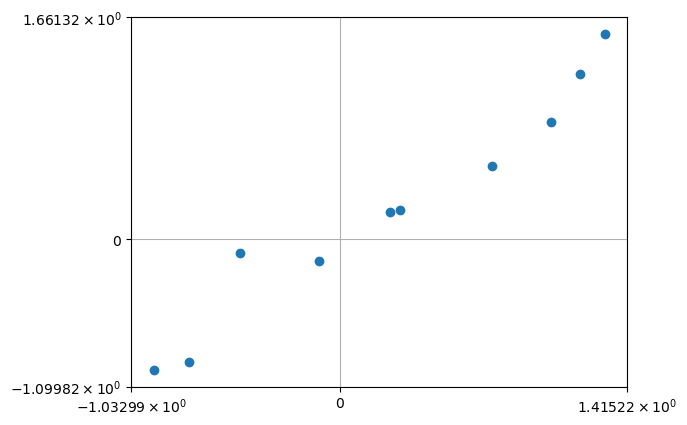

In [14]:
plt.scatter(x, x+y)
plt.yscale('symlog')
plt.xscale('symlog')
#plt.xlim([-0.2, 1.3])
#plt.ylim([-0.2, 1.3])
plt.grid()